# Obtencion de Estadisticas Descriptivas

Nombre: Max Eduardo Garcia Esquivel.
Matricula: A01236070.

## Paso 1: Leer archivo

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
diabetes = pd.read_csv("diabetes.csv")

## Paso 2: Cantidad de datos, variables y tipos

In [61]:
[numDatos,numVariables] = diabetes.shape
nVariables = diabetes.columns.values
sVariables = ""
for i in nVariables:
    sVariables = sVariables+i+", "
print("Se tienen en total: {}, {} Varibles con {} Datos".format(numVariables*numDatos,numVariables,numDatos))
print("Se tienen las variables: {}".format(sVariables[0:-2]))
for i in nVariables:
    tVar = diabetes[i].dtype
    nDatos = diabetes[i].notnull().sum()
    print("La Variable {} es de tipo {}, y tiene {} datos no vacios".format(i,tVar,nDatos))

Se tienen en total: 6912, 9 Varibles con 768 Datos
Se tienen las variables: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome
La Variable Pregnancies es de tipo int64, y tiene 768 datos no vacios
La Variable Glucose es de tipo int64, y tiene 768 datos no vacios
La Variable BloodPressure es de tipo int64, y tiene 768 datos no vacios
La Variable SkinThickness es de tipo int64, y tiene 768 datos no vacios
La Variable Insulin es de tipo int64, y tiene 768 datos no vacios
La Variable BMI es de tipo float64, y tiene 768 datos no vacios
La Variable DiabetesPedigreeFunction es de tipo float64, y tiene 768 datos no vacios
La Variable Age es de tipo int64, y tiene 768 datos no vacios
La Variable Outcome es de tipo int64, y tiene 768 datos no vacios


## Paso 3: Analisis de datos y rangos

In [67]:
nVariables = diabetes.columns.values
for i in nVariables:
    #No checo tipo ya que todos los datos estan en numerico
    minValue = diabetes[i].min()
    maxValue = diabetes[i].max()
    cualcuant = ""
    if minValue==0 and maxValue==1 and diabetes[i].dtype == "int64":
        cualcuant = "Cualitativa"
    else:
        cualcuant = "Cuantitativa"
    print("La Variable {} tiene un rango de [{},{}] y es {}".format(i,minValue,maxValue,cualcuant))

La Variable Pregnancies tiene un rango de [0,17] y es Cuantitativa
La Variable Glucose tiene un rango de [0,199] y es Cuantitativa
La Variable BloodPressure tiene un rango de [0,122] y es Cuantitativa
La Variable SkinThickness tiene un rango de [0,99] y es Cuantitativa
La Variable Insulin tiene un rango de [0,846] y es Cuantitativa
La Variable BMI tiene un rango de [0.0,67.1] y es Cuantitativa
La Variable DiabetesPedigreeFunction tiene un rango de [0.078,2.42] y es Cuantitativa
La Variable Age tiene un rango de [21,81] y es Cuantitativa
La Variable Outcome tiene un rango de [0,1] y es Cualitativa


## Paso 4: Media, mediana y desviacion estandar

In [93]:
nVariables = diabetes.columns.values
porcentajePeligroMedia = 30;
for i in nVariables:
    media = diabetes[i].mean()
    moda = diabetes[i].mode(dropna=True)[0]
    desviacionEstandar = diabetes[i].std()
    print("La Variable {} tiene las caracteristicas:".format(i))
    print("     Valor promedio o media: {}".format(media))
    print("     Valor mas comun o que mas se repite: {}".format(moda))
    Advertencia = ""
    if desviacionEstandar >= media*porcentajePeligroMedia/100:
        Advertencia = "Advertencia: la desviacion estandar es mayor a {}% la media, los datos son muy dispersos.".format(porcentajePeligroMedia)
    else:
        Advertencia = "Valor dentro del {}% de la media".format(porcentajePeligroMedia)
    print("     Desviacion estandar: {}, {}.".format(desviacionEstandar,Advertencia))

La Variable Pregnancies tiene las caracteristicas:
     Valor promedio o media: 3.8450520833333335
     Valor mas comun o que mas se repite: 1
     Desviacion estandar: 3.3695780626988623, Advertencia: la desviacion estandar es mayor a 30% la media, los datos son muy dispersos..
La Variable Glucose tiene las caracteristicas:
     Valor promedio o media: 120.89453125
     Valor mas comun o que mas se repite: 99
     Desviacion estandar: 31.97261819513622, Valor dentro del 30% de la media.
La Variable BloodPressure tiene las caracteristicas:
     Valor promedio o media: 69.10546875
     Valor mas comun o que mas se repite: 70
     Desviacion estandar: 19.355807170644777, Valor dentro del 30% de la media.
La Variable SkinThickness tiene las caracteristicas:
     Valor promedio o media: 20.536458333333332
     Valor mas comun o que mas se repite: 0
     Desviacion estandar: 15.952217567727677, Advertencia: la desviacion estandar es mayor a 30% la media, los datos son muy dispersos..
La Var

### Conclusiones

La mayor parte de los datos estan bastante desviados(en proporciona a la media), lo cual puede dificultar un poco el analisis, en cuanto a asignar una media a los datos, ya que si se puede obtener la media, pero los datos se desvian bastante de esta, aunque tambien nos ayuda a que al momento de ralizar un analisis grafico, sea mas visble el cambio entre los datos.
Al unico dato que talvez no debimos haber realizado una media fue al de Outcome, ya que parece ser una variable cualitativa, como una pregunta de si o no ya que solamente usa 1's y 0's, por lo que talvez no fue correcto, pero se realizo solamente para ver el resultado

# Exploracion de Datos: Analisis Estadistico

## Clasificacion de Datos

In [109]:
nVariables = diabetes.columns.values
names = []
tipoD = []
minValue = []
maxValue = []
cualcuant = []
tipo = []
rango = []
indexpd = []
Significado = []
Traduccion = []
c = 0
for i in nVariables:
    c = c+1;
    indexpd.append(c)
    if diabetes[i].dtype == "int64" or diabetes[i].dtype == "float64":
        names.append(i)
        tipoD.append(diabetes[i].dtype)
        minValue.append(diabetes[i].min())
        maxValue.append(diabetes[i].max())
        minValueDat = diabetes[i].min()
        maxValueDat = diabetes[i].max()
        if minValueDat==0 and maxValueDat==1 and diabetes[i].dtype == "int64":
            cualcuant.append("Cualitativa")
            tipo.append("Ordinal")
        else:
            cualcuant.append("Cuantitativa")
            if diabetes[i].dtype == "int64":
                tipo.append("Discreta")
            else:
                tipo.append("Continua")
        rango.append("[{},{}]".format(minValueDat,maxValueDat))
    else:
        names.append(i)
        tipoD.append(diabetes[i].dtype)
        cualcuant.append("Cualitativa")
        tipo.append("Nominal")
        rango.append("NaN")
Significado.append("Numero de Veces que ha estado en embarazo")
Significado.append("Concentracion de plasma de glucosa en 2 horas en examen oral de glucosa")
Significado.append("Presion diastolica de la sangre (mmHg)")
Significado.append("Grosor de la piel en el tricep")
Significado.append("2 horas con suero de insulina (muU/ml)")
Significado.append("Indice de masa corporal")
Significado.append("Funcion del arbol genealogico de diabetes")
Significado.append("Edad en años")
Significado.append("Variable de clase 268 de 768 son 1, otros son 0")
#diabetesExp = {"Nombre":pd.Series(names,index=indexpd),"Significado":pd.Series(Significado,index=indexpd),"Tipo":pd.Series(tipoD,index=indexpd),"Cual/Cuan":pd.Series(cualcuant,index=indexpd),"Subtipo":pd.Series(tipo,index=indexpd),"Rango":pd.Series(rango,index=indexpd)}
diabetesExp = {"Significado":pd.Series(Significado,index=names),"Tipo":pd.Series(tipoD,index=names),"Cual/Cuan":pd.Series(cualcuant,index=names),"Subtipo":pd.Series(tipo,index=names),"Rango":pd.Series(rango,index=names)}
diabetesDat = pd.DataFrame(diabetesExp)
diabetesDat

,Significado,Tipo,Cual/Cuan,Subtipo,Rango
Pregnancies,Numero de Veces que ha estado en embarazo,int64,Cuantitativa,Discreta,"[0,17]"
Glucose,Concentracion de plasma de glucosa en 2 horas ...,int64,Cuantitativa,Discreta,"[0,199]"
BloodPressure,Presion diastolica de la sangre (mmHg),int64,Cuantitativa,Discreta,"[0,122]"
SkinThickness,Grosor de la piel en el tricep,int64,Cuantitativa,Discreta,"[0,99]"
Insulin,2 horas con suero de insulina (muU/ml),int64,Cuantitativa,Discreta,"[0,846]"
BMI,Indice de masa corporal,float64,Cuantitativa,Continua,"[0.0,67.1]"
DiabetesPedigreeFunction,Funcion del arbol genealogico de diabetes,float64,Cuantitativa,Continua,"[0.078,2.42]"
Age,Edad en años,int64,Cuantitativa,Discreta,"[21,81]"
Outcome,"Variable de clase 268 de 768 son 1, otros son 0",int64,Cualitativa,Ordinal,"[0,1]"


## Medidas de Tendencia Central

In [108]:
nVariables = diabetes.columns.values
porcentajePeligroMedia = 30;
names = []
cualcuant = []
tipo = []
media = []
moda = []
mediana = []
desviacionEstandar = []
advertencias = []
indexpd = []
Significado = []
c = 0
for i in nVariables:
    c = c+1;
    indexpd.append(c)
    if diabetes[i].dtype == "int64" or diabetes[i].dtype == "float64":
        names.append(i)
        minValueDat = diabetes[i].min()
        maxValueDat = diabetes[i].max()
        media.append(diabetes[i].mean())
        moda.append(diabetes[i].mode(dropna=True)[0])
        mediana.append(diabetes[i].median())
        desviacionEstandar.append(diabetes[i].std())
        desviacionEstandarDat = diabetes[i].std()
        mediaDat = diabetes[i].mean()
        if minValueDat==0 and maxValueDat==1 and diabetes[i].dtype == "int64":
            cualcuant.append("Cualitativa")
            tipo.append("Ordinal")
            advertencias.append("Cualitativa, medidas de tendencia no muy utiles")
        else:
            cualcuant.append("Cuantitativa")
            if desviacionEstandarDat >= mediaDat*porcentajePeligroMedia/100:
                Advertencia = "La desviacion estandar es mayor a {}% la media".format(porcentajePeligroMedia)
            else:
                Advertencia = "Ninguna"
            advertencias.append(Advertencia)
            if diabetes[i].dtype == "int64":
                tipo.append("Discreta")
            else:
                tipo.append("Continua")
        rango.append("[{},{}]".format(minValueDat,maxValueDat))
    else:
        media.append("NaN")
        moda.append("NaN")
        mediana.append("NaN")
        desviacionEstandar.append("NaN")
        names.append(i)
        cualcuant.append("Cualitativa")
        tipo.append("Nominal")
        advertencias.append("Ninguna")
Significado.append("Numero de Veces que ha estado en embarazo")
Significado.append("Concentracion de plasma de glucosa en 2 horas en examen oral de glucosa")
Significado.append("Presion diastolica de la sangre (mmHg)")
Significado.append("Grosor de la piel en el tricep")
Significado.append("2 horas con suero de insulina (muU/ml)")
Significado.append("Indice de masa corporal")
Significado.append("Funcion del arbol genealogico de diabetes")
Significado.append("Edad en años")
Significado.append("Variable de clase 268 de 768 son 1, otros son 0")
#diabetesExp = {"Nombre":pd.Series(names,index=indexpd),"Significado":pd.Series(Significado,index=indexpd),"Tipo":pd.Series(tipoD,index=indexpd),"Cual/Cuan":pd.Series(cualcuant,index=indexpd),"Subtipo":pd.Series(tipo,index=indexpd),"Rango":pd.Series(rango,index=indexpd)}
diabetesExp = {"Significado":pd.Series(Significado,index=names),"Cual/Cuan":pd.Series(cualcuant,index=names),"Subtipo":pd.Series(tipo,index=names),"Media":pd.Series(media,index=names),"Moda":pd.Series(moda,index=names),"Mediana":pd.Series(mediana,index=names),"Desviacion Estandar":pd.Series(desviacionEstandar,index=names),"Advertencia":pd.Series(advertencias,index=names)}
diabetesDat = pd.DataFrame(diabetesExp)
diabetesDat

,Significado,Cual/Cuan,Subtipo,Media,Moda,Mediana,Desviacion Estandar,Advertencia
Pregnancies,Numero de Veces que ha estado en embarazo,Cuantitativa,Discreta,3.845052,1.000,3.0000,3.369578,La desviacion estandar es mayor a 30% la media
Glucose,Concentracion de plasma de glucosa en 2 horas ...,Cuantitativa,Discreta,120.894531,99.000,117.0000,31.972618,Ninguna
BloodPressure,Presion diastolica de la sangre (mmHg),Cuantitativa,Discreta,69.105469,70.000,72.0000,19.355807,Ninguna
SkinThickness,Grosor de la piel en el tricep,Cuantitativa,Discreta,20.536458,0.000,23.0000,15.952218,La desviacion estandar es mayor a 30% la media
Insulin,2 horas con suero de insulina (muU/ml),Cuantitativa,Discreta,79.799479,0.000,30.5000,115.244002,La desviacion estandar es mayor a 30% la media
BMI,Indice de masa corporal,Cuantitativa,Continua,31.992578,32.000,32.0000,7.884160,Ninguna
DiabetesPedigreeFunction,Funcion del arbol genealogico de diabetes,Cuantitativa,Continua,0.471876,0.254,0.3725,0.331329,La desviacion estandar es mayor a 30% la media
Age,Edad en años,Cuantitativa,Discreta,33.240885,22.000,29.0000,11.760232,La desviacion estandar es mayor a 30% la media
Outcome,"Variable de clase 268 de 768 son 1, otros son 0",Cualitativa,Ordinal,0.348958,0.000,0.0000,0.476951,"Cualitativa, medidas de tendencia no muy utiles"


## Correlacion

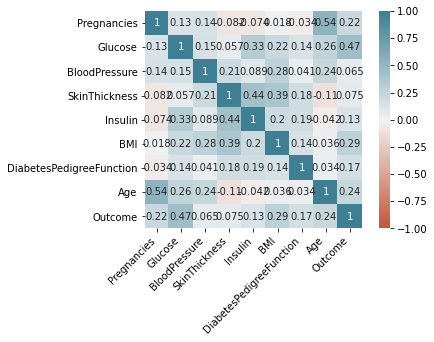

In [120]:
ax = sns.heatmap(
    diabetes.corr(),
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.show()

## Mapa de Calor

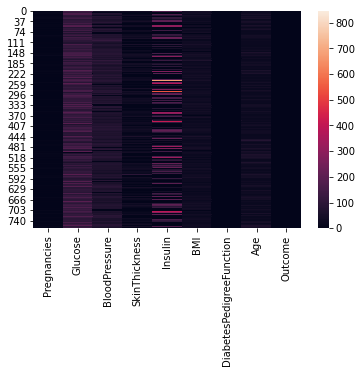

In [113]:
ax = sns.heatmap(diabetes)
plt.show()

## Bigote y Cajas

Pregnancies


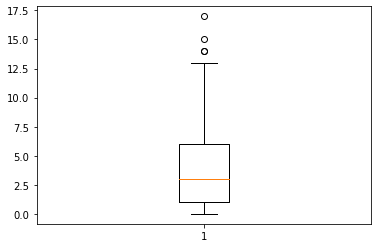

Glucose


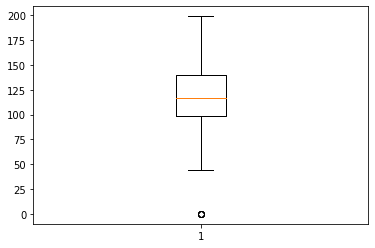

BloodPressure


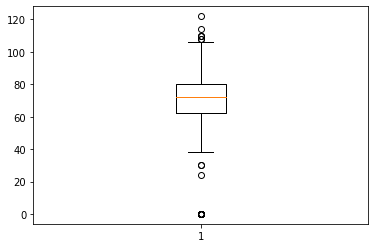

SkinThickness


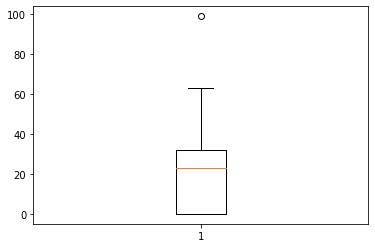

Insulin


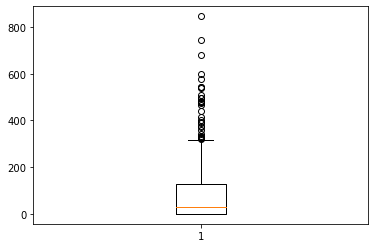

BMI


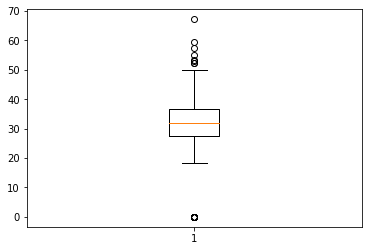

DiabetesPedigreeFunction


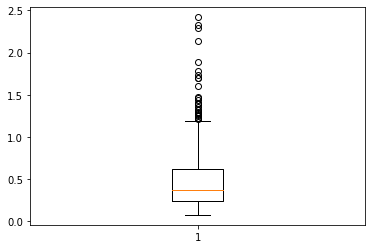

Age


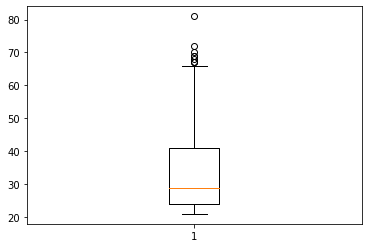

Outcome


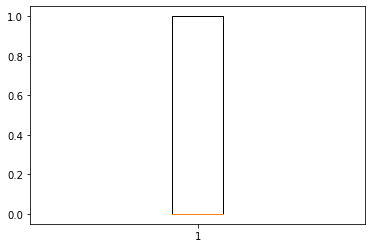

Tabla General


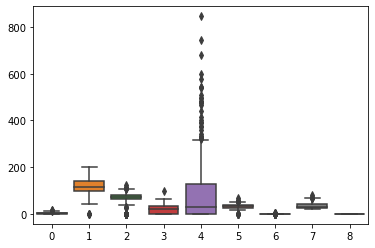

Tabla General sin Id


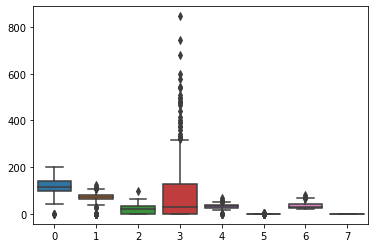

Tabla General


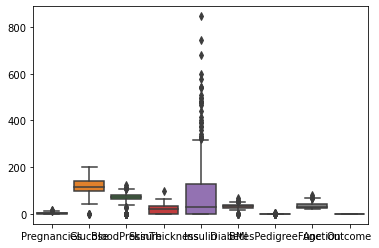

Tabla General sin Outcome


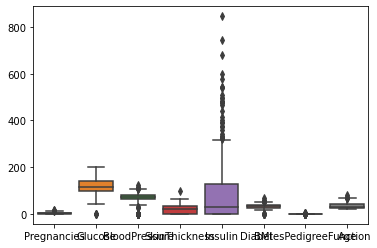

In [118]:
diabetes = pd.read_csv("diabetes.csv")
nVariables = diabetes.columns.values
graphValues = []
for i in nVariables:
    if diabetes[i].dtype == "int64" or diabetes[i].dtype == "float64":
        print(i)
        graphValues.append(diabetes[i])
        plt.boxplot(diabetes[i])
        plt.show()
print("Tabla General")
ax = sns.boxplot(data = graphValues)
plt.show()
print("Tabla General sin Id")
graphValues = graphValues[1:]
ax = sns.boxplot(data = graphValues)
plt.show()
diabetes2 = diabetes
print("Tabla General")
ax = sns.boxplot(data = diabetes)
plt.show()
print("Tabla General sin Outcome")
graphValues = graphValues[1:]
ax = sns.boxplot(data = diabetes.drop(columns=["Outcome"]))
plt.show()

### ¿Hay alguna variable que no aporta información?

La parte de presion sanguinea y espesor, no aportan mucho, su correlacion es bastante baja

### Si tuvieras que eliminar variables, ¿cuáles quitarías y por qué?

Las de presion sanguines y espesor, ya que no aportan mucho.

### ¿Existen variables que tengan datos extraños?

La de grosor de piel, insulina y BMI ya que tienen algunos 0 que seria como si la persona no estuviera viva.

### Si comparas las variables, ¿todas están en rangos similares? ¿Crees que esto afecte?

No estan en rango similares, pero es debido a que son diferentes cosas, y no deberia afectar a nuestro analisis

### ¿Puedes encontrar grupos qué se parezcan? ¿Qué grupos son estos?

En si todos estan realacionados entre si, pero mas que nada la glucosa e insulina en vida real debe estar muy relacionado y de los datos que tenemos la parte de DiabetesPedigreeFunction esta muy relacionado a el Outcome, entre mas alto es mas probable que tenga un 1